# Python For Data Science

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [2]:
import warnings
warnings.filterwarnings('ignore') #del warnings

importing the dataset :

In [3]:
path = "D:/ESILV Cours/S7/Python for Data Science/Projet/"
df = pd.read_csv(path + "OnlineNewsPopularity.csv")

### Let's have a look at the data first, to better start the data processing:

We can have a first glance a the dataset by using pd.info():

In [4]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

We can see that the data set is already clean: there are no NaN values and all features are float features (apart from the URL)

In [6]:
with pd.option_context('display.max_columns', 60):
    print(df.describe(include = "all")) # to see all columns

                                                      url     timedelta  \
count                                               39644  39644.000000   
unique                                              39644           NaN   
top     http://mashable.com/2014/05/06/community-teach...           NaN   
freq                                                    1           NaN   
mean                                                  NaN    354.530471   
std                                                   NaN    214.163767   
min                                                   NaN      8.000000   
25%                                                   NaN    164.000000   
50%                                                   NaN    339.000000   
75%                                                   NaN    542.000000   
max                                                   NaN    731.000000   

         n_tokens_title   n_tokens_content   n_unique_tokens  \
count      39644.000000       39644

Selection of the columns to be scaled depending on the variable type :

In [7]:
notToBeScaled = list()
toBeScaled = list()
for i in range(df.shape[1]):
    if max(df.iloc[:,i]) == 1 and min(df.iloc[:,i])== 0:
        notToBeScaled.append(df.iloc[:,i].name)
    else :
        toBeScaled.append(df.iloc[:,i].name)
toBeScaled.remove("url")
toBeScaled.remove(" timedelta")
toBeScaled.remove(" shares")

In [9]:
px.histogram(df.iloc[:,60] )

We can observe here that the repartition of the number of shares has some outliers (probably articles that went viral). This could impact the performance of our models. We can maybe cut the outliers (e.g. articles that have more than 15K shares).

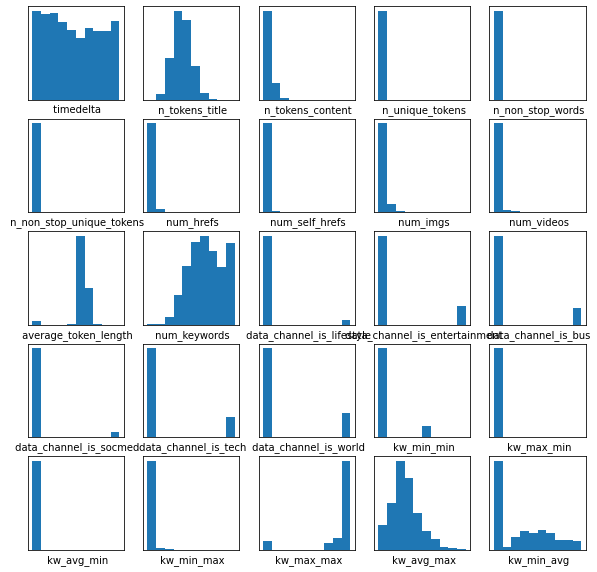

In [10]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.hist(df.iloc[:,i+1])
    plt.xlabel(df.iloc[:,i+1].name)
plt.show()


Many features have outliers. Using robust scaling (based on medians) might do the trick

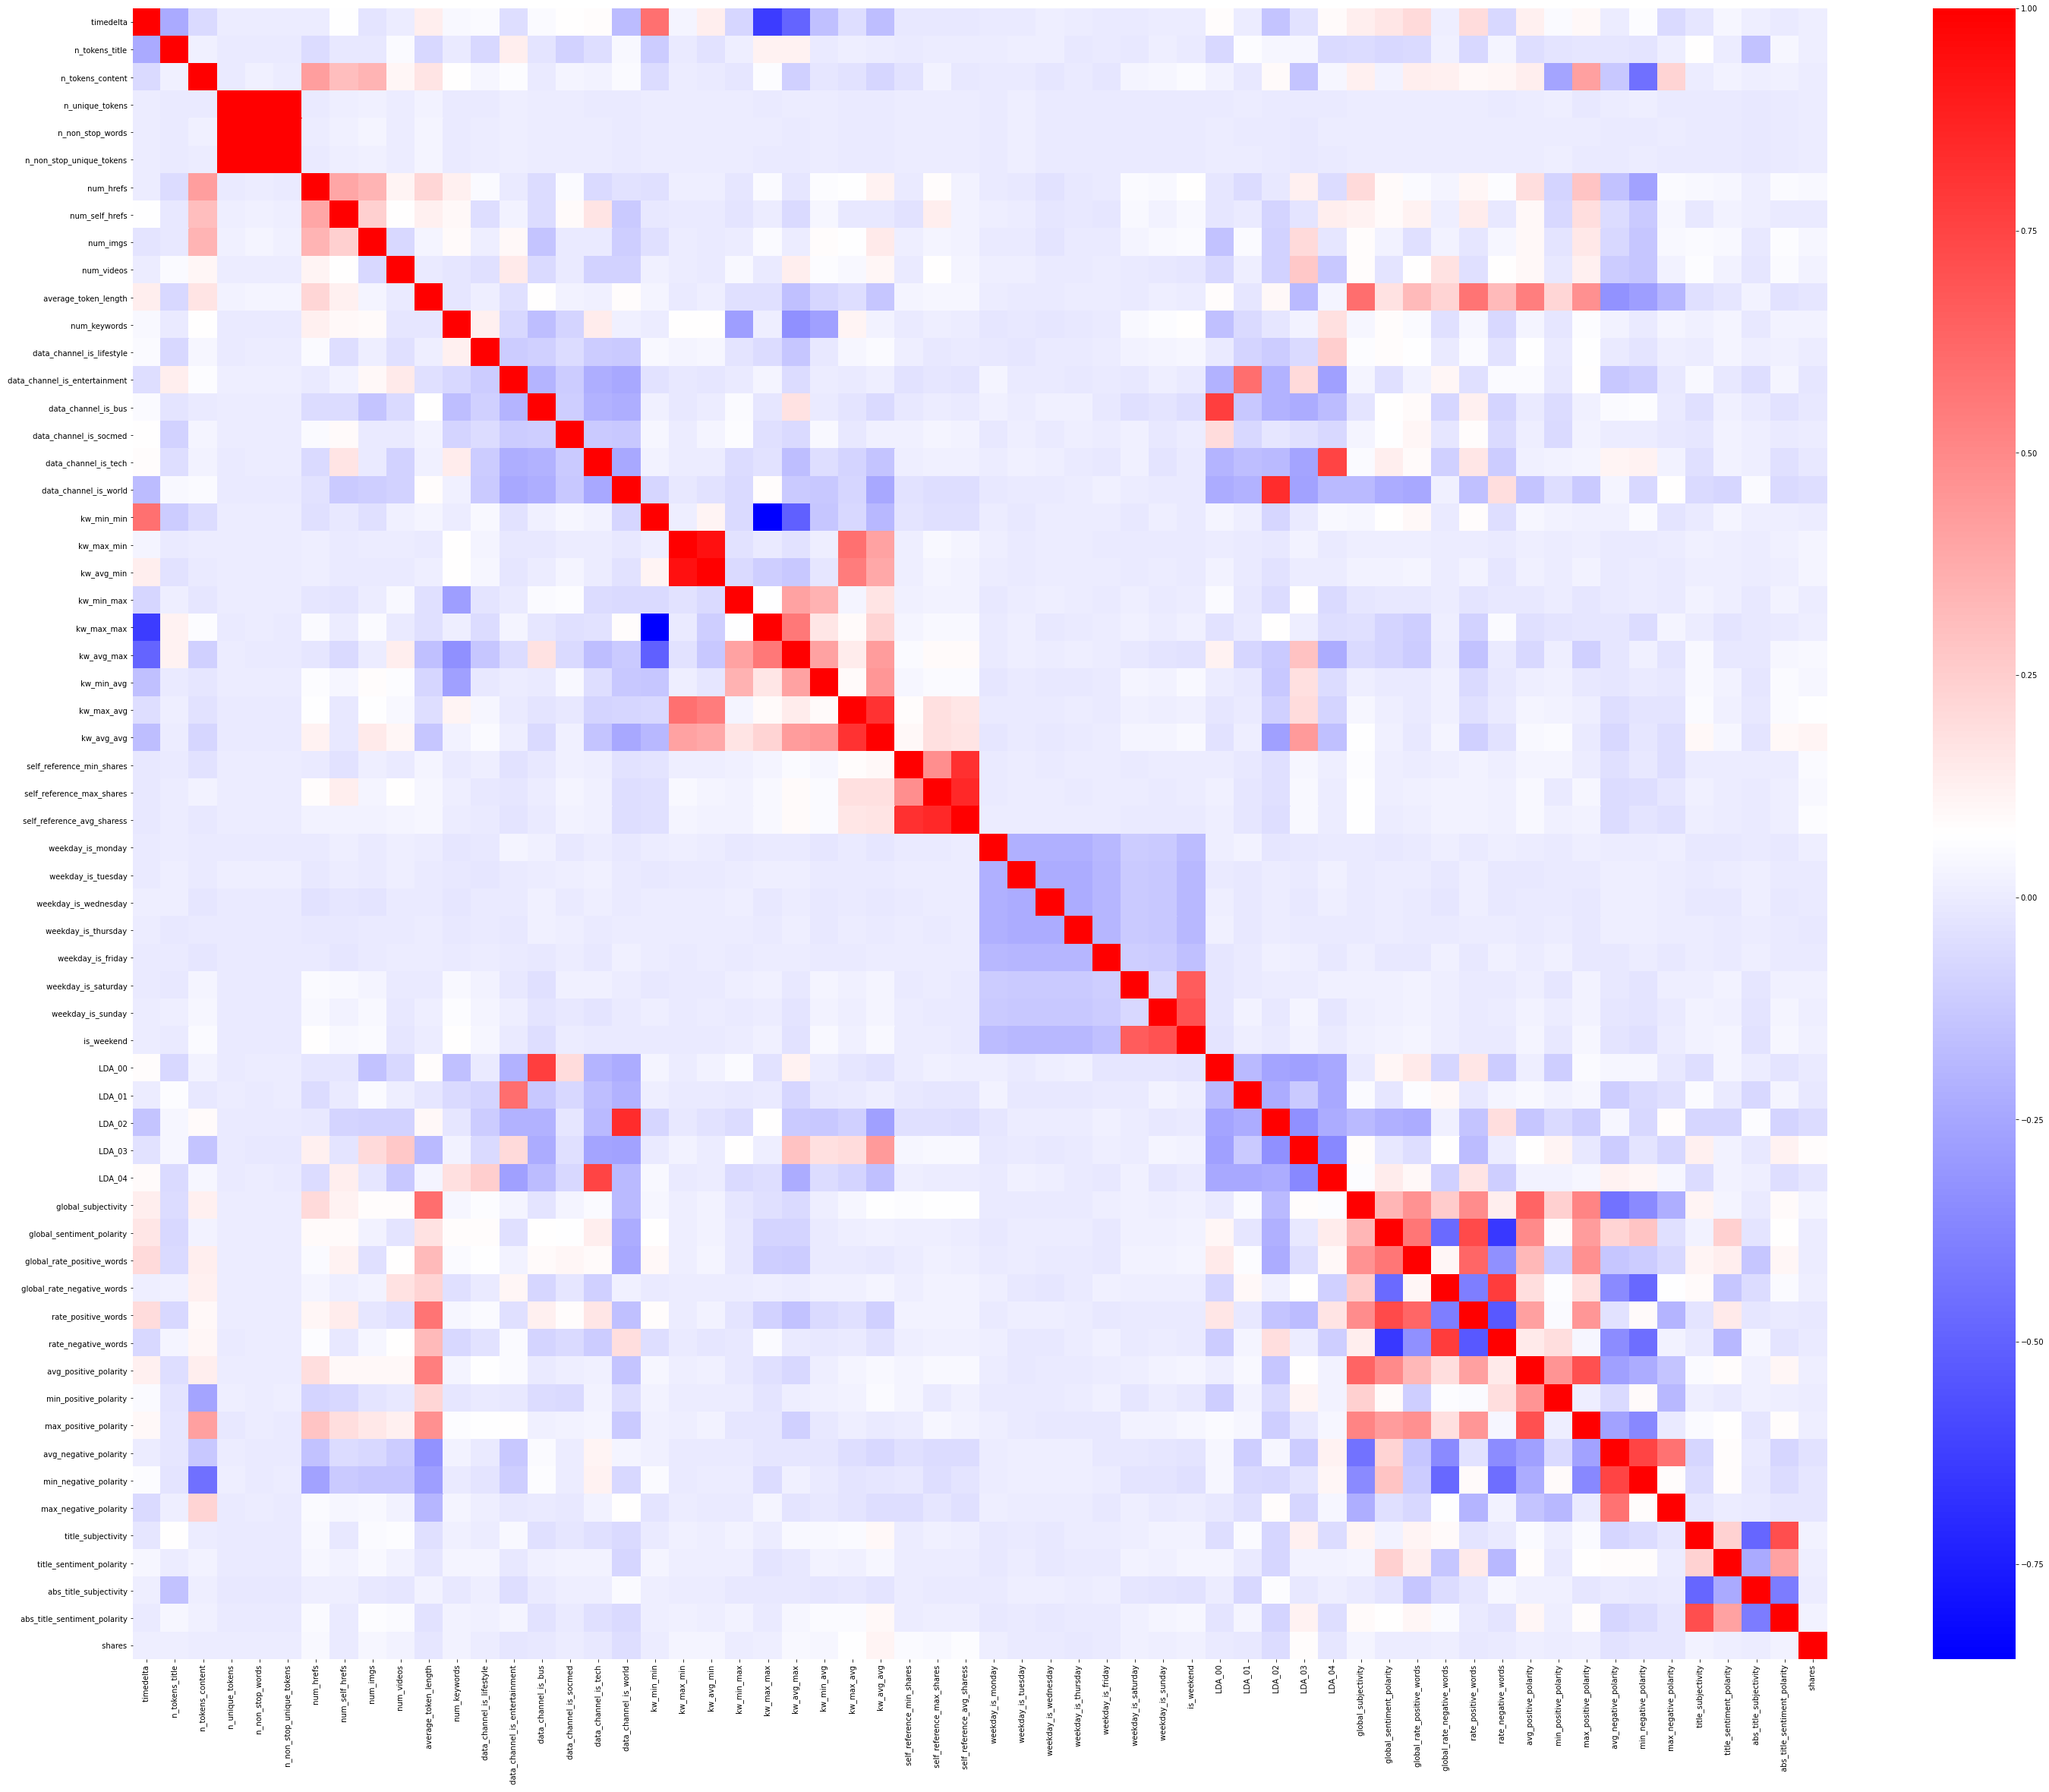

In [11]:
plt.figure(figsize=(50,40))
cor = df.corr(method ='pearson')
sns.heatmap(cor, cmap="bwr")
plt.show()

With the correlation matrix we observe that some group of features have a strong correlation with one-another, but few correlation with the rest of the dataset (like the week days). On the other hand the shares have very poor correlation with any other features. 

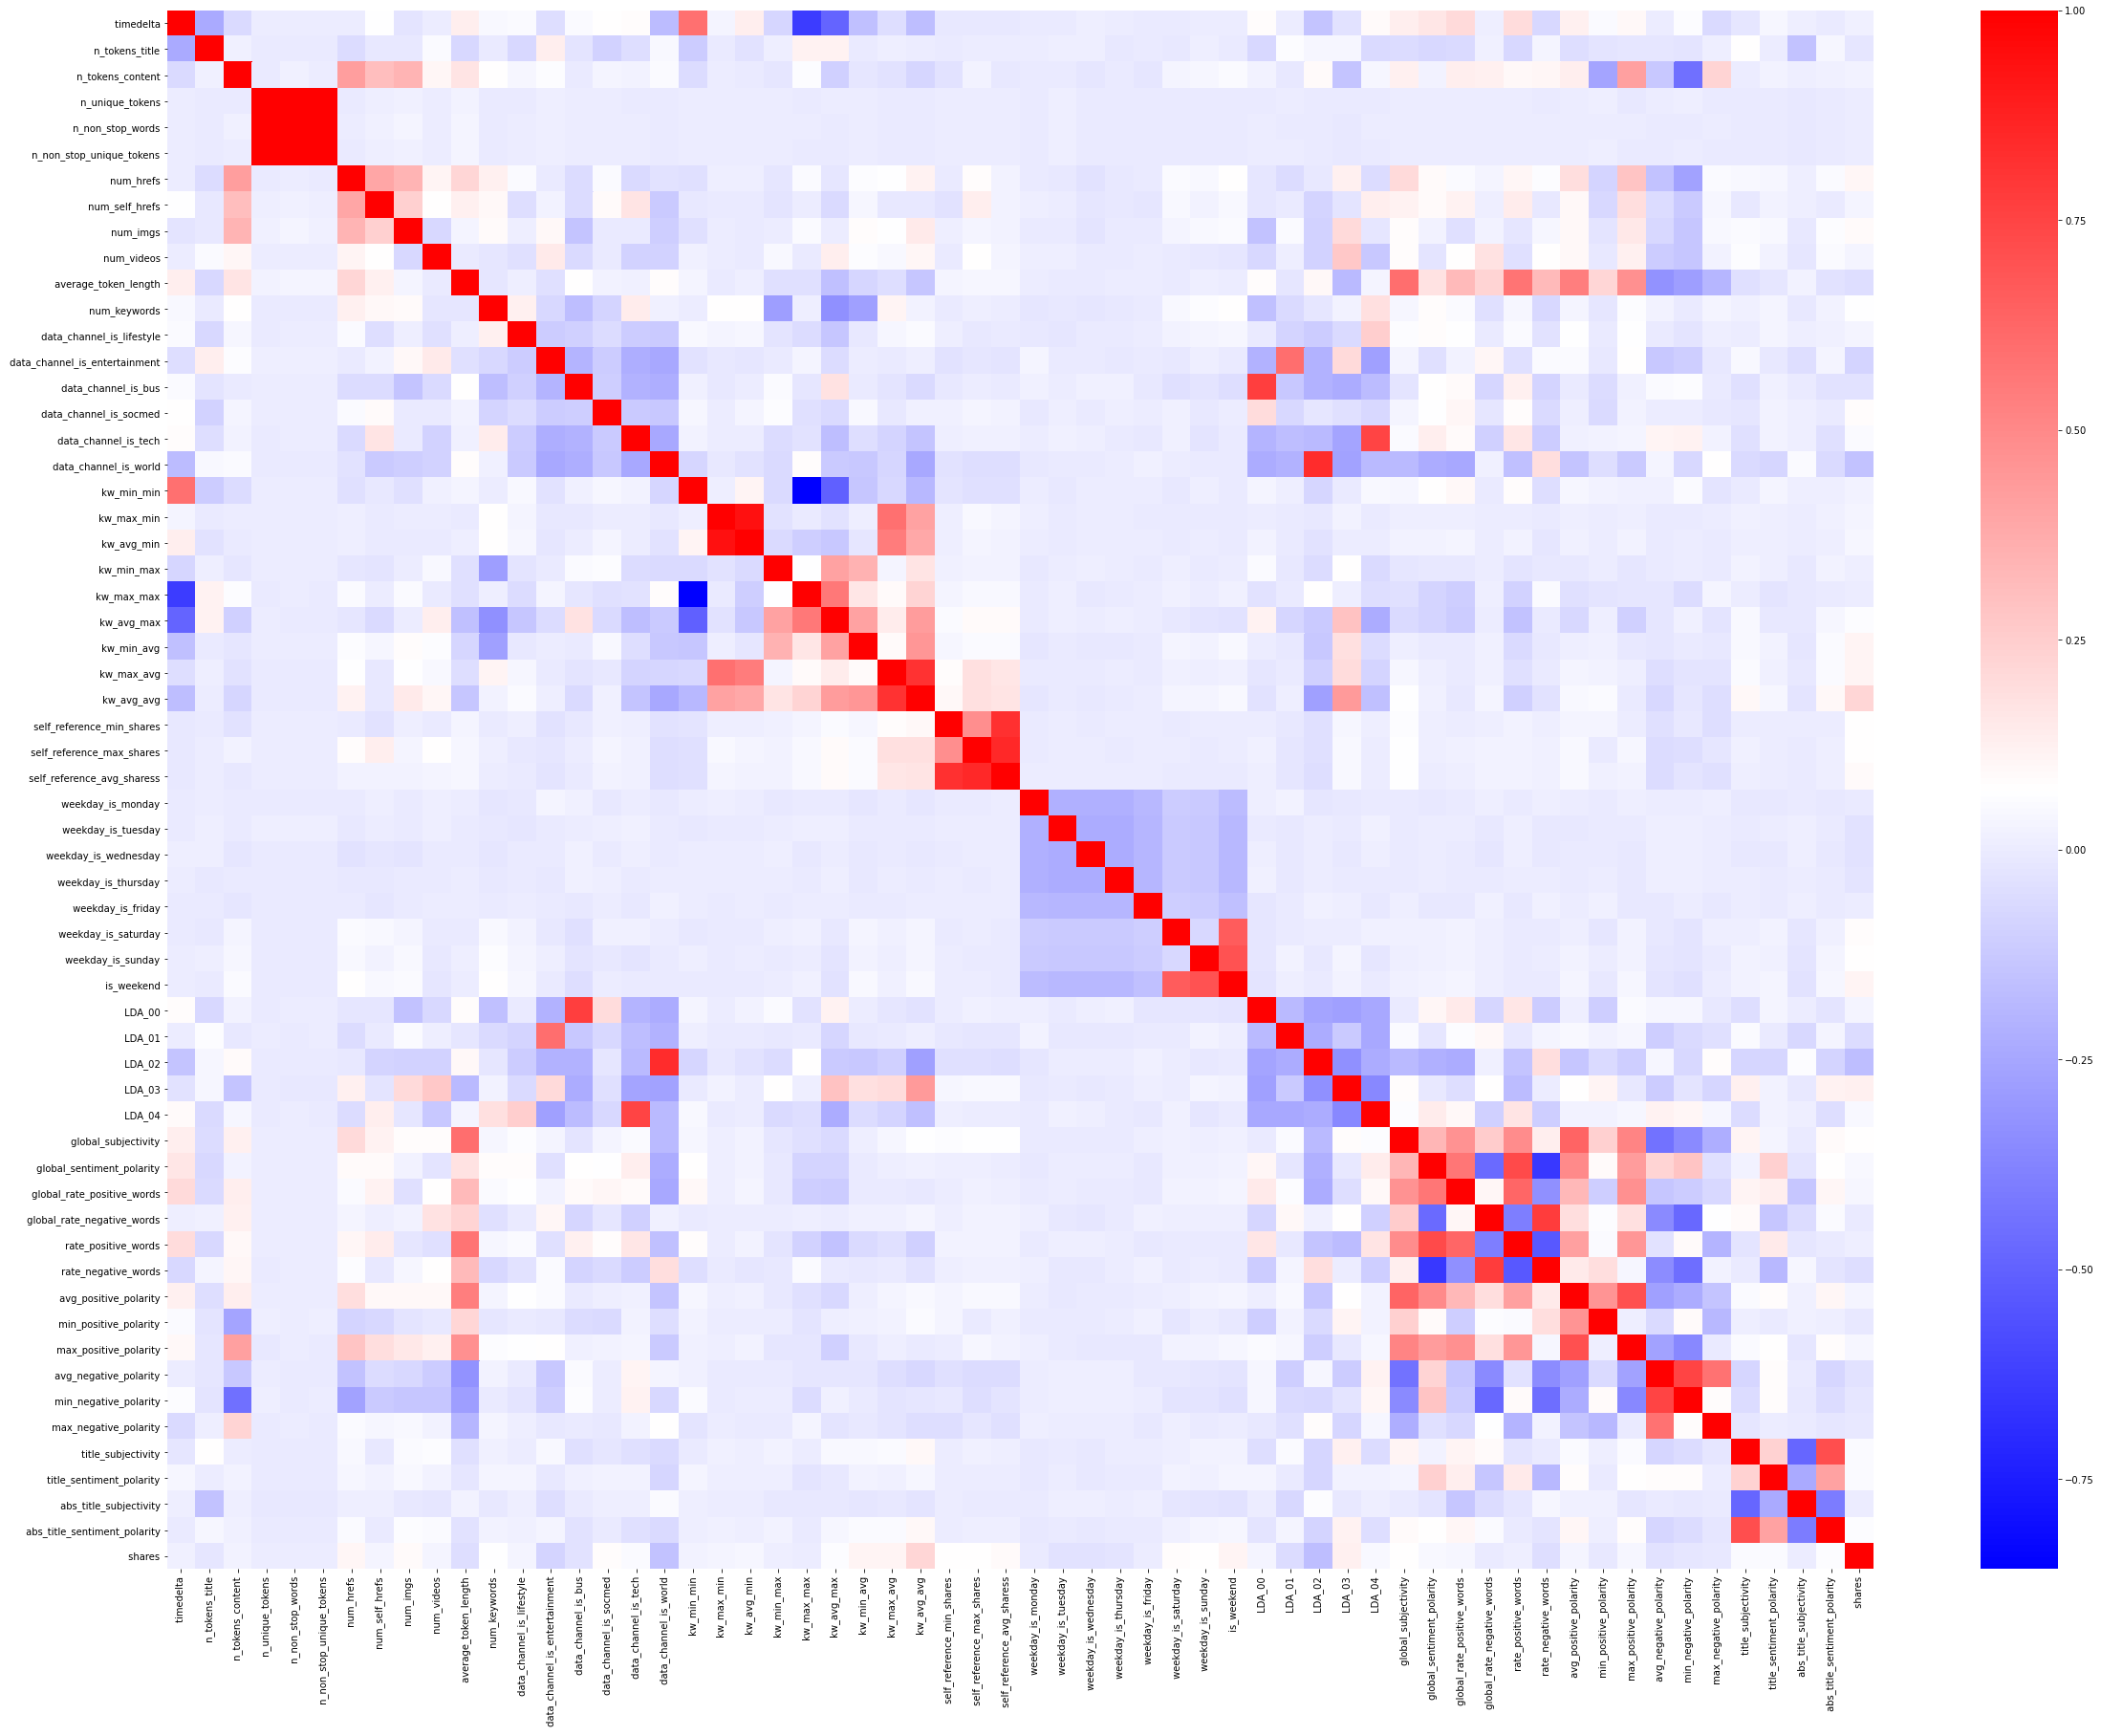

In [12]:
dflog = df.copy()
dflog.loc[:," shares"] = np.log(df.loc[:," shares"])
plt.figure(figsize=(40,30))
cor = dflog.corr(method ='pearson')
sns.heatmap(cor, cmap="bwr")
plt.show()

When applying the log function to the shares, we can see a bit more contrasted correlation for some features. We shall then try to use the log(shares) feature as it might improve our scores.


In terms of feature engineering, we will, for the moment try to use all features, and then we will see if some of them are irrelevant and should be removed.<br> So let's split the data :

In [13]:
X = df.drop(["url"," shares"," timedelta"], axis = 1)
y = df[" shares"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101) # 20 % of test data

Now let's scale our data using robust scale so that values on different scales can be compared:

In [14]:
scaler = RobustScaler()
scaler.fit(X_train.loc[:,toBeScaled]) #We fit only on the training data
X_train.loc[:,toBeScaled] = scaler.transform(X_train.loc[:,toBeScaled])
X_test.loc[:,toBeScaled] = scaler.transform(X_test.loc[:,toBeScaled])


The objective here is to predict a quantity (the number of shares an article gets). We have less than 100K examples, and we have many features that might be important. We shall thus begin to try two models:
1. Ridge Regression
2. Random Forest

## 1) Ridge Regression:

In [16]:
from sklearn.linear_model import Ridge

In [17]:
model = Ridge(alpha = 1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.03482004060582111

In [18]:
from sklearn.model_selection import validation_curve

alpha = np.logspace(-6, 6, 13)
train_score, val_score = validation_curve(model, X_train, y_train, "alpha", alpha, cv=5)

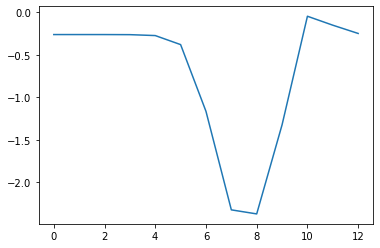

In [19]:
plt.plot(val_score.mean(axis=1))

## 2) Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
model = RandomForestRegressor(n_estimators = 300,max_depth = 10 ,max_features = 'auto')
model.fit(X_train, y_train)
model.score(X_test, y_test)

-0.1401066201094494

In [24]:
from sklearn import metrics
def Metric(y_test, predicted_test):
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_test))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_test))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_test)))

In [25]:
predicted_test = model.predict(X_test)
Metric(y_test, predicted_test)

Mean Absolute Error: 3100.673736660987
Mean Squared Error: 73348008.01187077
Root Mean Squared Error: 8564.345159547855


At this point the results are pretty terrible: on average, the model prediction makes an error of 8564 shares.

### Feature Engineering:

We will try to reduce the number of features and apply the log function to the target feature.

In [26]:
dflog = dflog.loc[:,[" LDA_02"," is_weekend", " kw_avg_avg"," data_channel_is_world", " average_token_length", " rate_negative_words"," shares"]]

We selected the features that had the strongest correlation according to the correlation matrix.

In [27]:
X = dflog.drop(" shares", axis = 1)
y = dflog[" shares"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101) # 20 % of test data

In [28]:
model = RandomForestRegressor(n_estimators = 300,max_depth = 10 ,max_features = 'auto')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.0898169620316257

In [29]:
predicted_test = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_test)))

Mean Absolute Error: 0.6644042841921729
Mean Squared Error: 0.7937906413615171
Root Mean Squared Error: 0.890949292250416


Even though the mean errors seem smaller when we apply the log function on the target feature, this reduction is due to the fact that the scale of the data in that feature is then much smaller (as it has the log function applied), thus the mean error is smaller as well, but the regression is not necessarily more accurate.

The results we get are terrible, there are not enough linear or logarithmic relations between the features to apply a regression

# New approach : Classification
After reading the paper published by the creators of the dataset, we realized that they were actually applying classification algorithms. The target feature is numerical, but they set a threshold, where every article having more shares than that threshold would be considered "popular", and other articles would be considered "not popular". That way we would have only two different values for that feature, making it catergorical. 


In [30]:
df[" shares"].describe(percentiles = [.50, .80, .85, .90])

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
50%        1400.000000
80%        3400.000000
85%        4400.000000
90%        6200.000000
max      843300.000000
Name:  shares, dtype: float64

The mean value is close to the 80th percentile value. Thus if a number of share is above average, it means that it is better than 80% of the articles of the dataset. 

We will then set our threshold to 3395 to sort the articles between not popular (0) and popular (1)


In [35]:
popularity_threshold = 3395
df["popular"] = np.where(df[" shares"]>popularity_threshold,1,0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popular
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,0
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


#### Splitting the data:

In [36]:
X = df.drop([" shares", "url", " timedelta", "popular"], axis = 1)
y = df["popular"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Scaling the data:

In [37]:
scaler = RobustScaler()
scaler.fit(X_train.loc[:,toBeScaled]) #We fit only on the training data
X_train.loc[:,toBeScaled] = scaler.transform(X_train.loc[:,toBeScaled])
X_test.loc[:,toBeScaled] = scaler.transform(X_test.loc[:,toBeScaled])

We will try four different classification algorithms and see which one classifies the best the data :
1. Random Forest
2. Adaptive Boosting Classifier
3. K-Nearest-Neighbours (KNN)
4. Naive Bayes

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import pickle

## 1) Random Forest:

In [39]:
from sklearn.ensemble import RandomForestClassifier

clf_rforest = RandomForestClassifier()
clf_rforest.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
filename = 'rforest.sav'
pickle.dump(clf_rforest, open(filename, 'wb'))

Using only accuracy to evaluate the performance of our model would not be clever as the repartition between the popular and not popular articles is 20%/80%. This we will need other metrics to evaluate it:

In [43]:
y_pred_rforest = clf_rforest.predict(X_test)
print(classification_report(y_test, y_pred_rforest, digits = 4))

              precision    recall  f1-score   support

           0     0.8038    0.9865    0.8858      6319
           1     0.5087    0.0547    0.0987      1610

    accuracy                         0.7973      7929
   macro avg     0.6562    0.5206    0.4923      7929
weighted avg     0.7438    0.7973    0.7260      7929



In [51]:
def ConfusionMatrix(cfMatrix):
    sns.heatmap(cfMatrix, annot=True, cmap='Reds')

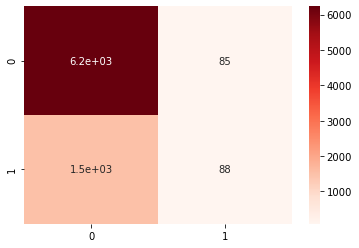

In [52]:
ConfusionMatrix(confusion_matrix(y_test, clf_rforest.predict(X_test)))

RandomForest : AUROC = 0.704


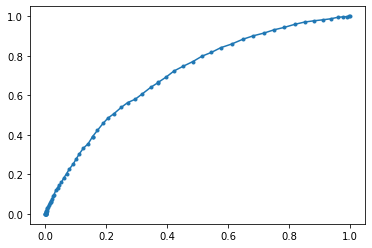

In [46]:
rf_probs = clf_rforest.predict_proba(X_test)
rf_probs = rf_probs[:,1]

rf_auc = roc_auc_score(y_test, rf_probs)
print("RandomForest : AUROC = %.3f" % (rf_auc))

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(rf_fpr, rf_tpr, marker=".", label="RandomForest (AUROC = %0.3f)" % rf_auc)

We could be satisfied with a AUC score of 70%, but we will see if other models perform better:

## 2) Adaptive Boosting Classifier

In [47]:
from sklearn.ensemble import AdaBoostClassifier

clf_ada = AdaBoostClassifier()
clf_ada.fit(X_train, y_train)

AdaBoostClassifier()

In [48]:
y_pred_ada = clf_ada.predict(X_test)
print(classification_report(y_test, y_pred_ada, digits = 4))

              precision    recall  f1-score   support

           0     0.8057    0.9805    0.8846      6319
           1     0.4854    0.0720    0.1255      1610

    accuracy                         0.7961      7929
   macro avg     0.6455    0.5263    0.5050      7929
weighted avg     0.7407    0.7961    0.7304      7929



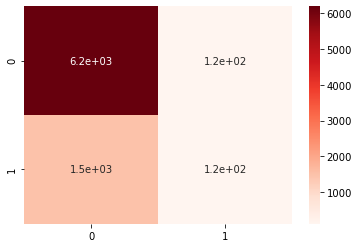

In [53]:
ConfusionMatrix(confusion_matrix(y_test, clf_ada.predict(X_test)))

AdaBoost : AUROC = 0.705


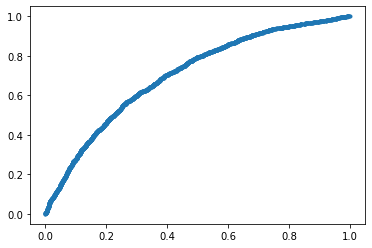

In [54]:
ada_probs = clf_ada.predict_proba(X_test)
ada_probs = ada_probs[:,1]

ada_auc = roc_auc_score(y_test, ada_probs)
print("AdaBoost : AUROC = %.3f" % (ada_auc))

ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_probs)
plt.plot(ada_fpr, ada_tpr, marker=".", label="AdaBoost (AUROC = %0.3f)" % ada_auc)

## 3) K-Nearest Neighbours:

In [56]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
y_pred_knn = clf_knn.predict(X_test)
print(classification_report(y_test, y_pred_knn, digits = 4))

              precision    recall  f1-score   support

           0     0.8138    0.9419    0.8732      6319
           1     0.4033    0.1540    0.2229      1610

    accuracy                         0.7819      7929
   macro avg     0.6085    0.5480    0.5480      7929
weighted avg     0.7304    0.7819    0.7411      7929



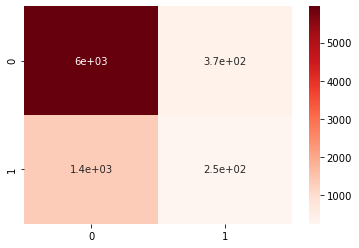

In [59]:
ConfusionMatrix(confusion_matrix(y_test, clf_knn.predict(X_test)))

KNN : AUROC = 0.620


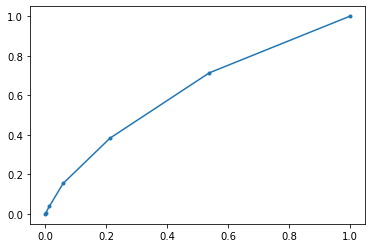

In [60]:
knn_probs = clf_knn.predict_proba(X_test)
knn_probs = knn_probs[:,1]

knn_auc = roc_auc_score(y_test, knn_probs)
print("KNN : AUROC = %.3f" % (knn_auc))

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
plt.plot(knn_fpr, knn_tpr, marker=".", label="KNN (AUROC = %0.3f)" % knn_auc)

## 4) Naive Bayes:

In [62]:
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB()
clf_GNB.fit(X_train, y_train)

GaussianNB()

In [63]:
y_pred_GNB = clf_GNB.predict(X_test)
print(classification_report(y_test, y_pred_GNB, digits = 4))

              precision    recall  f1-score   support

           0     0.7980    0.9756    0.8779      6319
           1     0.2414    0.0304    0.0541      1610

    accuracy                         0.7837      7929
   macro avg     0.5197    0.5030    0.4660      7929
weighted avg     0.6849    0.7837    0.7106      7929



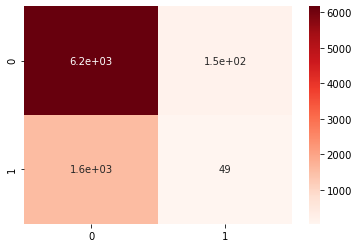

In [64]:
ConfusionMatrix(confusion_matrix(y_test, clf_GNB.predict(X_test)))

GNB : AUROC = 0.579


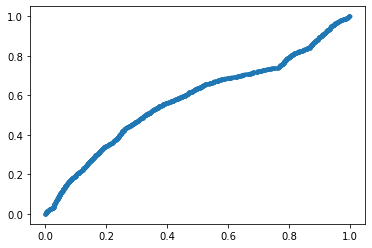

In [65]:
GNB_probs = clf_GNB.predict_proba(X_test)
GNB_probs = GNB_probs[:,1]

GNB_auc = roc_auc_score(y_test, GNB_probs)
print("GNB : AUROC = %.3f" % (GNB_auc))

GNB_fpr, GNB_tpr, _ = roc_curve(y_test, GNB_probs)
plt.plot(GNB_fpr, GNB_tpr, marker=".", label="GNB (AUROC = %0.3f)" % GNB_auc)

Now that we have tested each model, let us compare the different scores we got:

In [69]:
model = ["Random Forest", "Adaptive Boosting", "KNN", "Naive Bayes"]
score = [rf_auc, ada_auc, knn_auc, GNB_auc]

scores = pd.DataFrame({"Model" : model, "Score AUC" : score})
scores

,Model,Score AUC
0,Random Forest,0.704491
1,Adaptive Boosting,0.704720
2,KNN,0.620429
3,Naive Bayes,0.579315


In [71]:
fig = px.bar(scores, x='Model', y='Score AUC')
fig.show()

It is then the Adaboost that gave us the best AUC score. Let us then try to optimize it:

## Tuning:

To improve our model we will tune it with a GridSearch:

In [72]:
from sklearn.model_selection import GridSearchCV

It will test each parameter of the list to find which one gives the best score.

In [74]:
params = {'n_estimators' : [50, 100, 200, 300]}

grid_ada = GridSearchCV(clf_ada, params, cv = 5,scoring='roc_auc')
grid_ada.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [50, 100, 200, 300]},
             scoring='roc_auc')

In [75]:
grid_ada.best_estimator_, grid_ada.best_score_

(AdaBoostClassifier(n_estimators=100), 0.7028255256635939)

In [76]:
grid_ada.best_estimator_.score(X_test, y_test)

0.7972001513431707

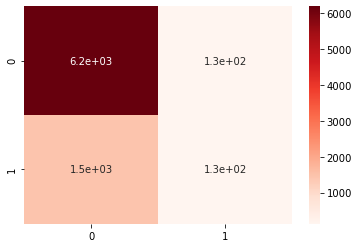

In [77]:
ConfusionMatrix(confusion_matrix(y_test, grid_ada.best_estimator_.predict(X_test)))

Final Model : AUROC = 0.706


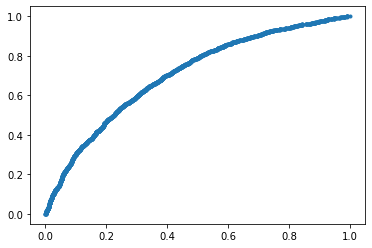

In [78]:
grid_ada_probs = grid_ada.best_estimator_.predict_proba(X_test)
grid_ada_probs = grid_ada_probs[:,1]

grid_ada_auc = roc_auc_score(y_test, grid_ada_probs)
print("Final Model : AUROC = %.3f" % (grid_ada_auc))

grid_ada_fpr, grid_ada_tpr, _ = roc_curve(y_test, grid_ada_probs)
plt.plot(grid_ada_fpr, grid_ada_tpr, marker=".", label="Final Model (AUROC = %0.3f)" % grid_ada_auc)

## Conclusion:

Despite struggling at the beginning with the regression, we eventually manage to obtain a great score with our improved Adaboost model, thanks to a scaling, a model selection, and an optimization of the hyperparameters with a gridsearch. 